In [4]:
%load_ext autoreload
%autoreload 2

import torch 
import glob
from torchvision.io import read_image
from matplotlib import pyplot as plt
from math import pi as PI
import seaborn as sns
sns.set()

In [2]:
images = glob.glob("renders/*.png")
images = sorted(images,key=lambda fn:int(fn.split(".")[0].split("_")[1]))

all_images = torch.stack([read_image(p) for p in images]).cuda().float()
all_images /= 255.0


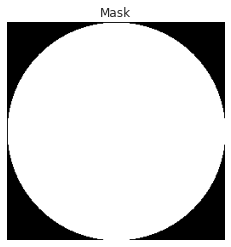

In [3]:
img_size = all_images.shape[2:4]
x = torch.arange(-1,1,2/img_size[0])
y = torch.arange(-1,1,2/img_size[1])
x_grid,y_grid = torch.meshgrid(x,y,indexing="ij")
mask = (x_grid.square()+y_grid.square())<1
plt.imshow(mask,cmap="gray")
plt.axis("off")
plt.title("Mask")
mask = mask.float().cuda()

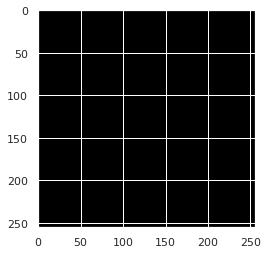

In [4]:

alpha_mask = all_images[:,3:4] * mask
alpha_weighted = all_images[:,:3] * alpha_mask
avg_colors = alpha_weighted.sum(dim=(2,3)) / alpha_mask.sum(dim=(2,3))

plt.imshow((all_images[4,:3]*mask).permute(1,2,0).cpu())

12 14


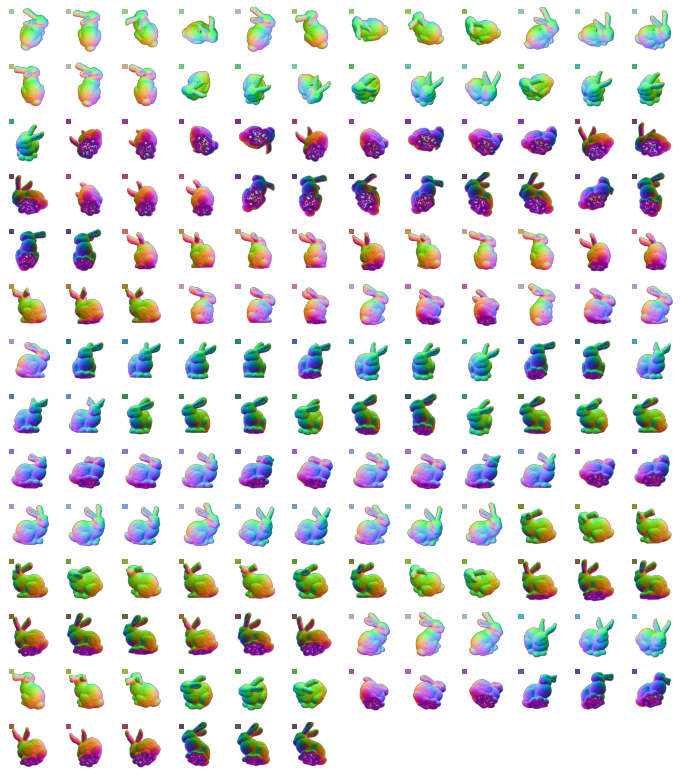

In [5]:
import math
from matplotlib.patches import Rectangle

num_images = avg_colors.shape[0]

num_cols = int(math.sqrt(num_images))
num_rows = math.ceil(num_images/num_cols)

print(num_cols,num_rows)

fig, axes = plt.subplots(num_rows,num_cols,figsize=(num_cols,num_rows))

for i in range(num_rows*num_cols):
    row = i//num_cols
    col = i%num_cols
    ax = axes[row][col]
    ax.set_axis_off()
    if i >= num_images:
        continue
    
    ax.imshow(all_images[i].cpu().permute((1,2,0)))
    ax.add_patch(Rectangle((10,10),30,30,facecolor=avg_colors[i].cpu().numpy()))

In [5]:
avg_colors = torch.tensor([[0.5922, 0.7137, 0.5961],
        [0.6314, 0.7020, 0.5373],
        [0.5882, 0.7216, 0.4745],
        [0.5412, 0.7333, 0.5412],
        [0.6196, 0.6863, 0.6235],
        [0.6235, 0.6902, 0.4157],
        [0.5333, 0.7176, 0.4275],
        [0.5804, 0.6902, 0.3608],
        [0.5216, 0.6745, 0.3176],
        [0.5804, 0.6902, 0.6588],
        [0.5451, 0.7137, 0.6353],
        [0.5373, 0.6824, 0.6824],
        [0.6588, 0.6784, 0.4745],
        [0.6510, 0.6784, 0.5765],
        [0.6784, 0.6510, 0.5216],
        [0.4667, 0.7255, 0.4667],
        [0.3765, 0.6706, 0.5255],
        [0.4784, 0.7176, 0.6000],
        [0.3647, 0.6392, 0.3843],
        [0.3961, 0.6667, 0.6392],
        [0.4824, 0.6824, 0.6745],
        [0.4471, 0.6745, 0.3412],
        [0.3333, 0.6275, 0.5686],
        [0.3059, 0.6078, 0.4275],
        [0.2824, 0.5804, 0.4706],
        [0.5451, 0.2353, 0.4588],
        [0.5922, 0.2471, 0.5020],
        [0.5412, 0.2392, 0.5725],
        [0.4784, 0.2275, 0.5059],
        [0.5882, 0.2706, 0.4196],
        [0.5765, 0.2706, 0.6196],
        [0.4824, 0.2471, 0.5961],
        [0.5333, 0.2706, 0.6510],
        [0.4863, 0.2745, 0.6706],
        [0.5412, 0.2745, 0.3843],
        [0.4824, 0.2510, 0.4275],
        [0.4863, 0.2824, 0.3608],
        [0.6196, 0.2941, 0.5529],
        [0.6314, 0.2980, 0.4549],
        [0.6627, 0.3451, 0.4941],
        [0.4275, 0.2392, 0.5569],
        [0.3765, 0.2627, 0.4941],
        [0.4314, 0.2510, 0.4510],
        [0.3804, 0.2706, 0.5882],
        [0.3922, 0.2824, 0.4118],
        [0.4353, 0.2784, 0.3882],
        [0.4314, 0.2627, 0.6314],
        [0.3451, 0.3020, 0.4431],
        [0.3333, 0.2980, 0.5373],
        [0.3020, 0.3373, 0.4824],
        [0.7059, 0.4588, 0.4118],
        [0.6902, 0.5216, 0.3137],
        [0.7176, 0.5647, 0.4157],
        [0.7294, 0.5216, 0.5059],
        [0.6588, 0.4078, 0.3412],
        [0.6824, 0.5922, 0.3294],
        [0.7137, 0.5922, 0.5137],
        [0.6902, 0.6275, 0.4235],
        [0.6706, 0.3686, 0.4235],
        [0.6980, 0.4235, 0.4980],
        [0.6431, 0.5529, 0.2588],
        [0.6392, 0.4627, 0.2784],
        [0.6039, 0.5098, 0.2275],
        [0.7098, 0.5765, 0.6039],
        [0.6745, 0.5412, 0.6902],
        [0.7059, 0.4784, 0.5961],
        [0.6549, 0.6118, 0.6784],
        [0.6549, 0.4471, 0.6824],
        [0.6667, 0.3882, 0.5961],
        [0.6706, 0.6353, 0.6078],
        [0.6314, 0.4980, 0.7333],
        [0.6314, 0.5882, 0.7373],
        [0.6000, 0.5490, 0.7608],
        [0.2588, 0.4392, 0.5569],
        [0.2902, 0.5059, 0.6627],
        [0.2588, 0.5176, 0.5647],
        [0.2392, 0.4863, 0.4667],
        [0.3059, 0.4039, 0.6392],
        [0.3176, 0.5686, 0.6627],
        [0.2510, 0.5294, 0.4588],
        [0.2941, 0.5765, 0.5843],
        [0.2863, 0.3608, 0.5569],
        [0.2588, 0.4039, 0.4784],
        [0.3529, 0.5529, 0.7176],
        [0.3451, 0.4667, 0.7098],
        [0.4000, 0.5294, 0.7569],
        [0.2588, 0.5216, 0.3765],
        [0.2863, 0.4980, 0.3098],
        [0.2588, 0.4431, 0.3961],
        [0.3020, 0.5451, 0.3137],
        [0.3137, 0.3961, 0.3412],
        [0.3020, 0.3569, 0.4118],
        [0.2706, 0.5529, 0.3765],
        [0.3451, 0.4471, 0.2824],
        [0.3373, 0.5294, 0.2706],
        [0.3843, 0.4980, 0.2431],
        [0.4784, 0.4588, 0.7725],
        [0.5059, 0.3882, 0.7490],
        [0.5412, 0.4667, 0.7725],
        [0.5137, 0.5412, 0.7843],
        [0.4431, 0.3804, 0.7373],
        [0.5529, 0.4039, 0.7451],
        [0.5608, 0.5490, 0.7804],
        [0.5804, 0.4706, 0.7569],
        [0.4157, 0.4510, 0.7529],
        [0.4588, 0.5373, 0.7804],
        [0.5216, 0.3373, 0.7176],
        [0.4627, 0.3255, 0.7098],
        [0.5451, 0.5922, 0.7608],
        [0.5216, 0.6235, 0.7412],
        [0.4902, 0.5843, 0.7686],
        [0.5686, 0.6275, 0.7294],
        [0.4627, 0.6157, 0.7412],
        [0.4314, 0.5804, 0.7529],
        [0.5804, 0.5961, 0.7451],
        [0.5020, 0.6471, 0.7176],
        [0.5569, 0.6549, 0.7059],
        [0.4549, 0.5490, 0.2078],
        [0.4941, 0.6039, 0.2275],
        [0.5216, 0.5529, 0.2039],
        [0.4863, 0.5059, 0.2000],
        [0.4196, 0.5843, 0.2392],
        [0.5647, 0.6118, 0.2353],
        [0.5451, 0.5059, 0.2039],
        [0.5843, 0.5608, 0.2235],
        [0.4000, 0.5490, 0.2314],
        [0.4353, 0.5020, 0.2118],
        [0.5490, 0.6471, 0.2667],
        [0.4667, 0.6275, 0.2549],
        [0.5137, 0.4353, 0.2353],
        [0.4824, 0.3725, 0.2784],
        [0.4549, 0.4353, 0.2392],
        [0.5412, 0.3725, 0.2824],
        [0.4275, 0.3765, 0.2863],
        [0.4078, 0.4314, 0.2588],
        [0.5725, 0.4353, 0.2510],
        [0.4549, 0.3255, 0.3216],
        [0.5176, 0.3216, 0.3216],
        [0.6078, 0.6275, 0.7137],
        [0.6353, 0.6549, 0.6549],
        [0.5961, 0.6588, 0.6902],
        [0.3490, 0.6196, 0.6549],
        [0.3882, 0.6039, 0.7176],
        [0.4275, 0.6471, 0.6980],
        [0.6549, 0.6510, 0.3686],
        [0.6235, 0.6039, 0.2667],
        [0.6000, 0.6549, 0.2980],
        [0.3569, 0.5608, 0.2667],
        [0.3137, 0.5725, 0.3294],
        [0.3843, 0.6039, 0.2745],
        [0.6196, 0.3451, 0.6588],
        [0.6039, 0.4235, 0.7294],
        [0.5608, 0.3294, 0.6980],
        [0.3686, 0.3804, 0.6941],
        [0.3373, 0.3216, 0.6118],
        [0.4000, 0.3059, 0.6667],
        [0.6000, 0.3804, 0.3020],
        [0.6314, 0.3216, 0.3804],
        [0.5686, 0.3137, 0.3412],
        [0.3529, 0.3294, 0.3804],
        [0.3765, 0.3804, 0.3137],
        [0.4078, 0.3216, 0.3490]])

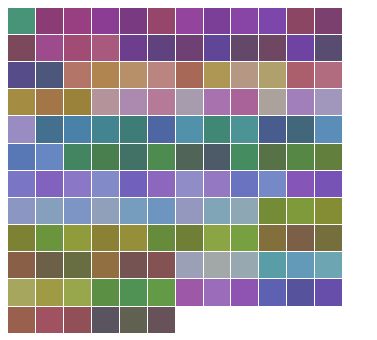

In [6]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import math

num_cols = math.ceil(math.sqrt(avg_colors.shape[0]))
num_rows = avg_colors.shape[0]//num_cols

fig, ax = plt.subplots(figsize=(num_cols/2,num_rows/2))

ax.set_ylim((0,num_rows*10))
ax.set_xlim((0,num_cols*10))
ax.set_axis_off()
for i in range(avg_colors.shape[0]):
    row = num_cols- i//num_rows
    col = i%num_rows
    ax.add_patch(Rectangle((col*10,row*10),10,10,facecolor=avg_colors[i].numpy()))

In [7]:
from plyfile import PlyData, PlyElement
import numpy as np

plydata = PlyData.read('../sphere.ply')
positions = np.stack([plydata["vertex"].data["x"],plydata["vertex"].data["y"],plydata["vertex"].data["z"]]).T
cameras = torch.from_numpy(positions)

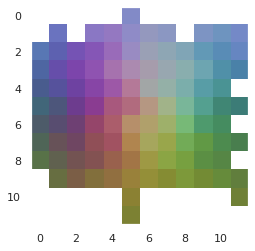

In [8]:
from sh import to_spherical
cameras_spherical = to_spherical(cameras)

res = 12

pos_norm = cameras_spherical.clone()
pos_norm[:,0]/=PI
pos_norm[:,1]/=2*PI

# scale to the center of the pixels and convert to index
pos_norm = (pos_norm * (res-1) + 1/ res).long()
# plt.imshow(render.cpu())
#render[pos_norm] = 0

#plt.imshow(render)
render_discrete = torch.ones((res,res,3))

for i,p in enumerate(pos_norm):
    render_discrete[p[0]][p[1]] = avg_colors[i].cpu()
plt.imshow(render_discrete)
plt.grid(False)

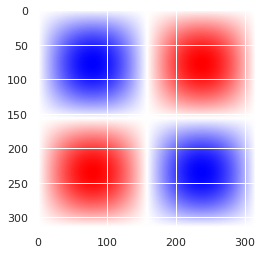

In [9]:

from sh import get_spherical_harmonics,get_spherical_harmonics_element,clear_spherical_harmonics_cache
resolution = 100
x = torch.arange(0,PI,1/resolution)
y = torch.arange(0,2*PI,2/resolution)
x_grid,y_grid = torch.meshgrid(x,y, indexing='ij')

l = 2
m = -1

values = get_spherical_harmonics_element(l,m,x_grid,y_grid)


plt.imshow(values,cmap="bwr")

# SH Testing 

Picking random coefficients, render them, and try to estimate them again'

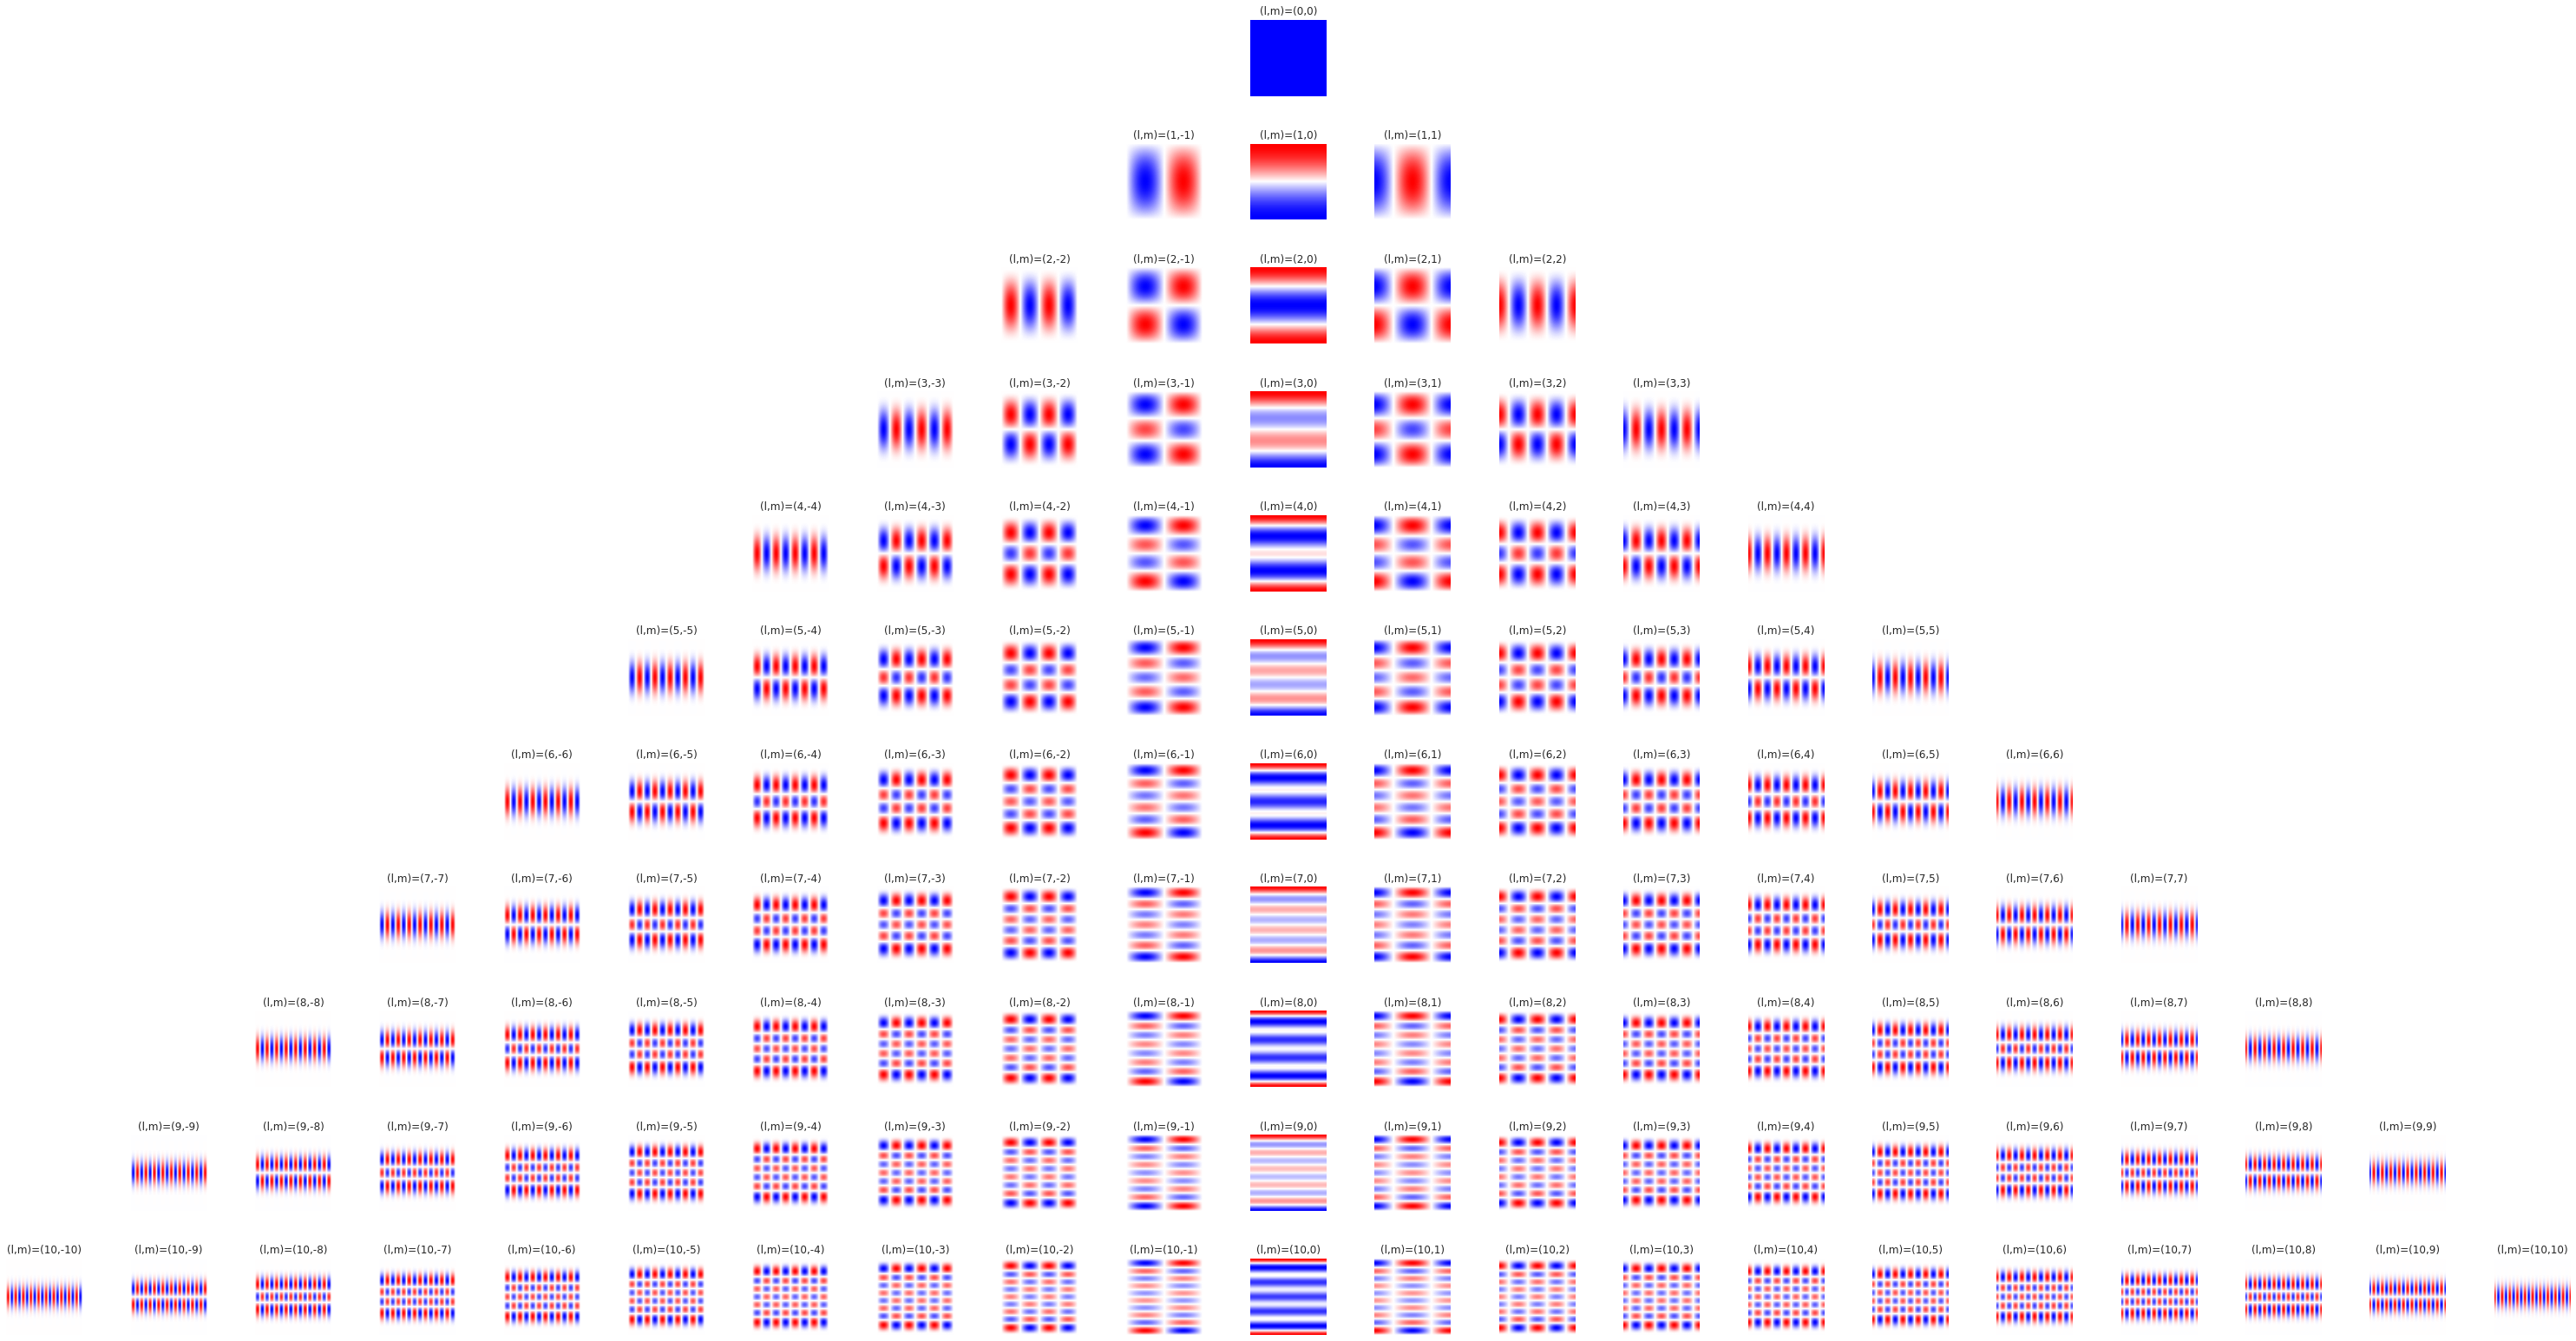

In [10]:
l_max = 10
fig,axes = plt.subplots(l_max+1,l_max*2+1,figsize=(2*(l_max*2+1),2*(l_max+1)))
fig.tight_layout()

x = torch.arange(0,PI,1/resolution)
y = torch.arange(0,2*PI,2/resolution)
x_grid,y_grid = torch.meshgrid(x,y, indexing='ij')

for l in range(l_max+1):
    for m in range(l_max*2+1):
        axes[l][m].set_axis_off()

for l in range(l_max+1):
    for m in range(-l,l+1):
        img_data = get_spherical_harmonics_element(l,m,x_grid,y_grid)
        ax = axes[l][l_max+m]
        ax.imshow(img_data,cmap="bwr")
        ax.set_title(f"(l,m)=({l},{m})")
        ax.set_yticks([])
        ax.set_xticks([])

In [10]:
from sh_py.coeficient_builder import SphericalHarmonicsCoeficientBuilder,SphericalHarmonicsEvaluator


torch.Size([162, 162])

In [133]:
from math import sqrt, pi as PI

def lm2flat_index(l, m):
    return l * (l + 1) - m

def flat2lm_index(i):
    l = int(sqrt(i))
    m = l * (l + 1) - i
    return l, m

def calc_sh(l_max,coords):
    assert (l_max+1)**2 < coords.shape[0], "to few samples"
    values = torch.zeros((coords.shape[0],(l_max+1)**2))

    for l in range(l_max+1):
        sh = get_spherical_harmonics(l,coords[:,0],coords[:,1])
        values[:,lm2flat_index(l,l):lm2flat_index(l,-l)+1] = sh
    return values
    
def calc_coeficients(l_max,coords,target):
    sh = calc_sh(l_max,coords)
    A = sh.T@sh 
    B = (sh.T@target)
    return torch.linalg.lstsq(A,B).solution

def evalute_sh(coefs,x,y):
    l_max = int(math.sqrt(coefs.shape[0])-1)
    Y = torch.zeros((*x.shape,3))
    for l in range(l_max+1):
        y_lm = get_spherical_harmonics(l,x,y)
        Y += y_lm@coefs[lm2flat_index(l,l):lm2flat_index(l,-l-1)]

    return Y


coefs = calc_coeficients(11,cameras_spherical,target)
coefs

tensor([[ 1.7512e+00,  1.7422e+00,  1.7796e+00],
        [ 3.2298e-02,  5.0018e-01, -2.9396e-03],
        [ 1.4283e-02,  3.0764e-02,  6.2712e-01],
        [ 4.5261e-01,  4.1378e-02,  2.5636e-02],
        [ 1.8264e-02,  2.3500e-02,  7.9667e-04],
        [ 1.0206e-02,  7.2210e-03,  3.2061e-02],
        [ 9.7332e-03,  3.9017e-02, -1.2566e-02],
        [-1.2327e-02,  4.9020e-03,  7.7916e-03],
        [-2.6142e-02,  2.5943e-02, -2.6954e-02],
        [-1.6673e-02,  1.0608e-02, -4.0317e-03],
        [-1.4248e-02, -1.4704e-02, -1.6644e-02],
        [-1.6798e-03, -1.7009e-02, -2.8948e-02],
        [ 9.6361e-03,  5.0102e-03, -3.1605e-02],
        [-2.1927e-02, -5.5936e-04, -1.3115e-02],
        [-7.9868e-03,  1.0301e-02,  9.4118e-03],
        [ 1.2446e-02,  3.9731e-03,  2.2906e-03],
        [-7.0005e-04,  4.7038e-03,  5.5937e-03],
        [ 1.0452e-03,  1.6810e-03,  4.9087e-03],
        [-1.1981e-03, -4.5676e-03, -6.0374e-03],
        [-5.0109e-03, -1.9320e-03, -6.6600e-03],
        [ 1.4709e-03

In [134]:
builder = SphericalHarmonicsCoeficientBuilder(0,(3,),solve_ls=True)
for (pos,color) in zip(cameras,avg_colors):
   builder.add_samples(pos,color)
coefs = builder.compute_coeficients().T
coefs

tensor([[1.7513, 1.7423, 1.7795]])

(tensor(0.1960), tensor(0.7861))

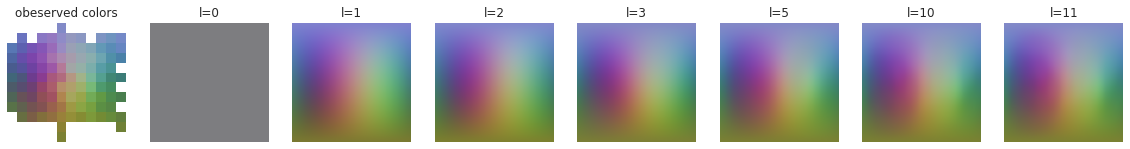

In [135]:
x = torch.arange(0,PI,PI/resolution)
y = torch.arange(0,2*PI,2*PI/resolution)
x_grid,y_grid = torch.meshgrid(x,y, indexing='ij')

ls = [0,1,2,3,5,10,11]

fig,axes = plt.subplots(1,len(ls)+1,figsize=(1*20,(len(ls)+1)*20))

target = avg_colors.cpu()
values = []
for i,l in enumerate(ls):
    clear_spherical_harmonics_cache()
    coefs = calc_coeficients(l,cameras_spherical,target)
    
    # builder = SphericalHarmonicsCoeficientBuilder(l,(3,),solve_ls=True)
    # for (pos,color) in zip(cameras,avg_colors):
    #    builder.add_samples(pos,color)
    # coefs = builder.compute_coeficients().T
    clear_spherical_harmonics_cache()
    Y = evalute_sh(coefs,x_grid,y_grid)
    ax = axes[i+1]
    ax.imshow(Y.clip(0,1))
    ax.set_axis_off()
    ax.set_title(f"l={l}")

axes[0].imshow(render_discrete)
axes[0].set_axis_off()
axes[0].set_title("obeserved colors")
Y.min(),Y.max()

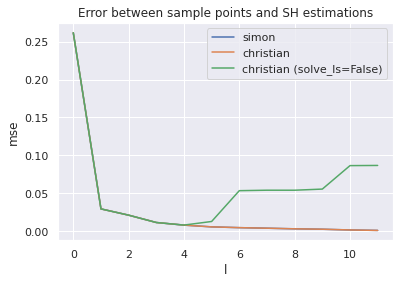

In [143]:
l_max = 12
values_simon = []
target = avg_colors.cpu()
for l in range(l_max):

    clear_spherical_harmonics_cache()
    coefs_l = calc_coeficients(l,cameras_spherical,target)
    clear_spherical_harmonics_cache()
   
    Y = evalute_sh(coefs_l,cameras_spherical[:,0],cameras_spherical[:,1])
    values_simon.append((Y-target).norm(2,dim=1).mean())

plt.plot(values_simon,label="simon")

values_christian = []

for l in range(l_max):
    builder = SphericalHarmonicsCoeficientBuilder(l,(3,))
    for (pos,color) in zip(cameras,avg_colors):
        builder.add_samples(pos,color)
    coefs_py = builder.compute_coeficients()
    
    evaluator = SphericalHarmonicsEvaluator(l)
    Y =evaluator(cameras)@coefs_py.T
    values_christian.append((Y-target).norm(2,dim=1).mean())

plt.plot(values_christian,label="christian")

values_christian = []
for l in range(l_max):
    builder = SphericalHarmonicsCoeficientBuilder(l,(3,),solve_ls=False)
    for (pos,color) in zip(cameras,avg_colors):
        builder.add_samples(pos,color)
    coefs_py = builder.compute_coeficients()
    
    evaluator = SphericalHarmonicsEvaluator(l)
    Y =evaluator(cameras)@coefs_py.T
    values_christian.append((Y-target).norm(2,dim=1).mean())

plt.plot(values_christian,label="christian (solve_ls=False)")

plt.xticks(range(0,l_max,2))
plt.xlabel("l")
plt.ylabel("mse")
plt.title("Error between sample points and SH estimations")
plt.legend()

In [137]:
plt.plot(coefs.abs().mean(dim=(1,2)))
plt.xticks(range(0,l_max+1,2))
plt.xlabel("l")
plt.ylabel("coefficients (absolute mean)")

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [320]:
data = [(*list(pos.numpy()),*list((color*255).byte().numpy())) for (pos,color) in zip(cameras,avg_colors.cpu())]
vertices = np.array(data,dtype=[('x', 'f4'), ('y', 'f4'),('z', 'f4'),('red', 'u1'),('green', 'u1'),('blue', 'u1')])

ply_file = PlyData(
        [
            PlyElement.describe(
                vertices, 'vertex',
            ),
            plydata["face"]
        ],
         text=True
    )

ply_file.write("vis.ply")

In [321]:
n=16
theta = torch.arange(0,PI,PI/n)
phi = torch.arange(0,2*PI,2*PI/n)


theta_grid,phi_grid = torch.meshgrid(theta,phi, indexing='ij')
theta_grid = theta_grid.flatten()
phi_grid = phi_grid.flatten()

x = theta_grid.sin()*phi_grid.cos()
y = theta_grid.sin()*phi_grid.sin()
z = theta_grid.cos()

vertices = np.array([tuple((x,y,z)) for x,y,z in zip(x,y,z)],dtype=[('x', 'f4'), ('y', 'f4'),('z', 'f4')])

ply_file = PlyData(
        [
            PlyElement.describe(
                vertices, 'vertex',
            )
        ],
         text=True
    )

ply_file.write("vis.ply")

In [140]:

l_max = 11

builder = SphericalHarmonicsCoeficientBuilder(l_max,(3,))
for (pos,color) in zip(cameras,avg_colors):
    builder.add_samples(pos,color)
coefs_py = builder.compute_coeficients()

coefs = calc_coeficients(l_max,cameras_spherical,avg_colors.cpu())

Text(0, 0.5, 'mse')

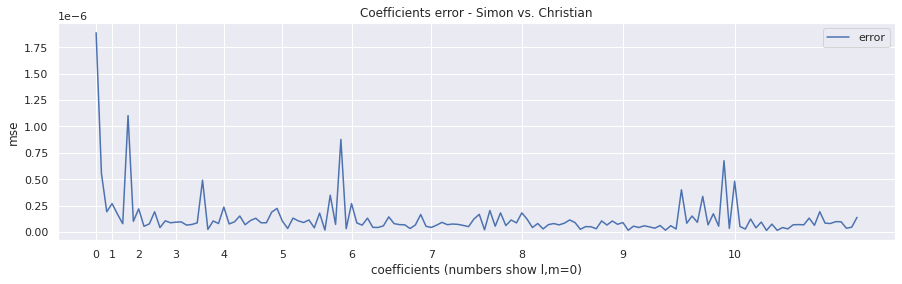

In [141]:
fig,ax=plt.subplots(1,1,figsize=(15,4))

ax.plot((coefs-coefs_py.T).norm(2,dim=-1),label="error")
#ax.plot(coefs_py[i,1:],label="christian")
ax.legend()
ax.set_title("Coefficients error - Simon vs. Christian")
ax.set_xticks([lm2flat_index(l,-l) for l in range(l_max)],range(l_max))
ax.set_xlabel("coefficients (numbers show l,m=0)")
ax.set_ylabel("mse")
#ax.set_yscale("log")